## Adult Income Dataset - Exploratory Data Analysis (EDA)
This project is part of the work I completed during my first term in the AI & ML program at Lambton College. The focus is on performing an Exploratory Data Analysis (EDA) of the Adult Income Dataset.

### Overview
The Adult Income Dataset is widely used for predictive modeling, particularly for classification tasks. The primary goal is to predict whether an individual's annual income exceeds $50,000 based on various demographic and employment attributes.



We have been provided with an adult income dataset from https://archive.ics.uci.edu/dataset/2/adult
This dataset shows different features that can be used to predict a person’s income amount, specifically if this income is lower or more significant than 50k per year. 


Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

The features provided are the following:


* Age 
* Workclass 
* Fnlwgt
* Education
* Education.num  
* Marital.status
* Occupation  
* Relationship
* Race
* Sex
* Capital.gain 
* Capital.loss
* Hours.per.week 
* Native.country  
* Income

#### Disclaimer: This was a group project.

## I. Get the Data

1. Load Libraries

In [1]:
#load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


2. Load the data

In [2]:
adultIncome = pd.read_csv('Adult_income.csv')

3. check the data, dimemssions, top 5 columns, type of data

In [3]:
#get dimensions  of the dataset
adultIncome.shape

(32561, 15)

In [4]:
#get important information about all the variables
adultIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#get the first 5 rows 
adultIncome.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
#get the first 5 rows 
adultIncome.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


So far, we can see that we have 15 features that are related to a person’s income like age, education, work class, sex, and others. Also the data is distributed between categorical and numerical values; using the df.info property, we can see our data is complete, but when we took our first and last five rows, we realized that missing values exist with the sign of  '?'

## II. Explore the Data
Here we pretend to get to understand the data better, for that we will follow the next steps:

1. Study Features (categorical,numerical, % missing values, noise data)
2. Visualize data 
3. Usefulness of data


1. Study Features (categorical,numerical, % missing values, noise data)

In [7]:
adultIncome.apply(pd.unique)

age               [90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 3...
workclass         [?, Private, State-gov, Federal-gov, Self-emp-...
fnlwgt            [77053, 132870, 186061, 140359, 264663, 216864...
education         [HS-grad, Some-college, 7th-8th, 10th, Doctora...
education.num     [9, 10, 4, 6, 16, 15, 13, 14, 7, 12, 11, 2, 3,...
marital.status    [Widowed, Divorced, Separated, Never-married, ...
occupation        [?, Exec-managerial, Machine-op-inspct, Prof-s...
relationship      [Not-in-family, Unmarried, Own-child, Other-re...
race              [White, Black, Asian-Pac-Islander, Other, Amer...
sex                                                  [Female, Male]
capital.gain      [0, 99999, 41310, 34095, 27828, 25236, 25124, ...
capital.loss      [4356, 3900, 3770, 3683, 3004, 2824, 2754, 260...
hours.per.week    [40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 3...
native.country    [United-States, ?, Mexico, Greece, Vietnam, Ch...
income                                          

In [8]:
#check for duplicates 
adultIncome.duplicated().sum()

24

In [9]:
adultIncome['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [10]:
adultIncome["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [11]:
adultIncome["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [12]:
adultIncome["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
adultIncome["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [14]:
adultIncome["marital.status"].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [15]:
adultIncome["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [16]:
adultIncome["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [17]:
adultIncome["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [18]:
adultIncome["native.country"].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [19]:
adultIncome["capital.gain"].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [20]:
#show the statistical value of the numerical variables
adultIncome.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
adultIncome[].unique()

SyntaxError: invalid syntax (3048794008.py, line 1)

In [22]:
#show the statistical values of the categorical values 
adultIncome.describe(include="object")

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


After checking the unique values, statistical values and value counts of some variables, we categorize our data in the following manner: 

##### Categorical 

* Nominal: workclass, occupation, relationship, race, native.country `->` this value has no relation or order whatsoever; for example, white race does not relate to black 

* Ordinal: education, marital.status  `->` Education can be ordered in a meaningful way since you can do a PhD without doing 7th grade also, marital status has an order; for being able to be divorced, you need to be married first

* Dichotomous: sex, income `->` this variable has values that can be converted to 0,1 or yes, no

##### Continuous 
* Interval: age, hours.per.week, education.num,fnlwgt `->` this value is never cero 

* Ratio: capital.gain, capital.loss `->` values that can be absolute zero 

* Age -> Age of the person at the time of the poll 
* Workclass -> Type of company the person works for
* Fnlwgt -> amount of people follow this pattern
* Education -> level of education of the person, master, PhD, college, etc
* Education.num -> years spend in education 
* Marital.status -> marital status of the person
* Occupation -> actual occupation the person has
* Relationship -> shows if the person has any dependent 
* Race -> color terminology for the person
* Sex -> gender 
* Capital.gain -> 
* Capital.loss
* Hours.per.week -> hours worked per week 
* Native.country -> country the person belongs to 
* Income -> category income per year  less or greater than 50k



2. Visualize data 

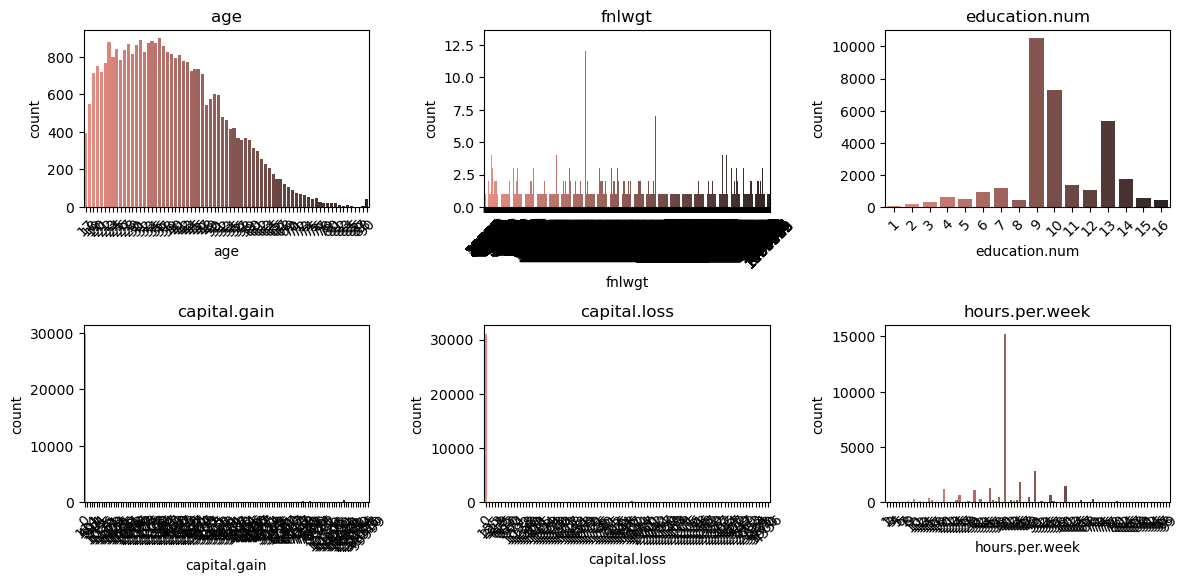

In [23]:


#Examing data distribution 
cols =['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
#create a bar chart for all colums
plt.figure(figsize=(12, 20)) 

#iterate to plot each feature
for i, column in enumerate(cols, 1):
    #create a subplot 
    plt.subplot(7, 3, i)
    #using seaborn we will create a countplot with a plalette color salmon
    sns.countplot(x=column, data=adultIncome, palette='dark:salmon_r')
    #rotate labels for better visualization
    plt.xticks(rotation=45)
    #add title
    plt.title(column)

 #tight graph   
plt.tight_layout()
#show
plt.show()


####  Explore the data and gain insights 

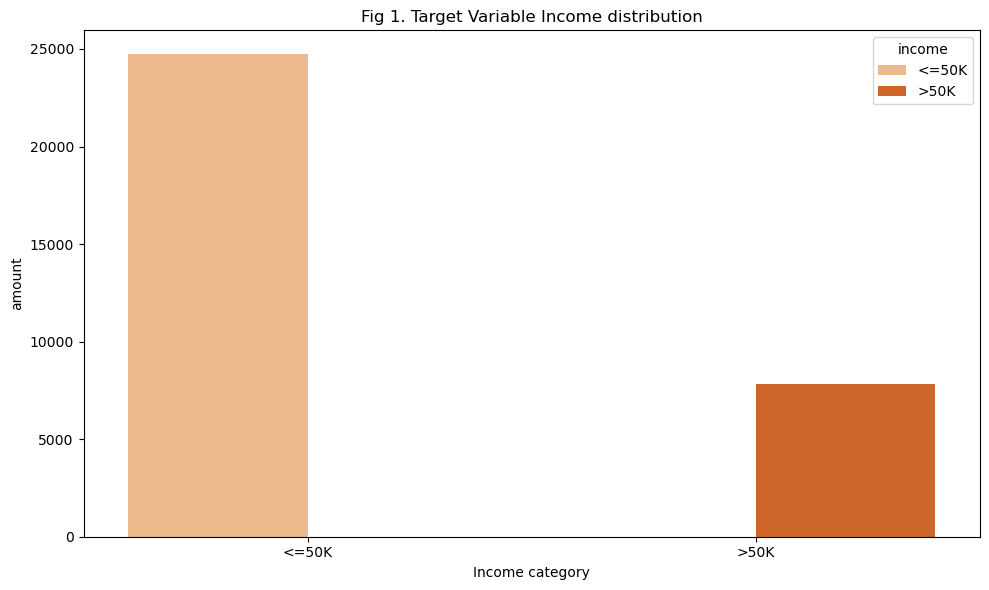

In [24]:
#show the amount of income per category
#size of the plot
plt.figure(figsize=(10, 6))
#using seaborn plot
sns.countplot(data=adultIncome, x='income', hue='income', palette='Oranges')
#add title
plt.title('Fig 1. Target Variable Income distribution')
#add x label
plt.xlabel('Income category')
#add y label
plt.ylabel('amount')


# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

The first insight we want to know is how well our data is distributed. We have used Income as our target variable, and as we can see, most of our data is in the category of <=50k, which makes us question what gender has an income >50k. Since this dataset is from 1994, we can initially assume the majority will be men, since the labor market was dominated by men so many years.

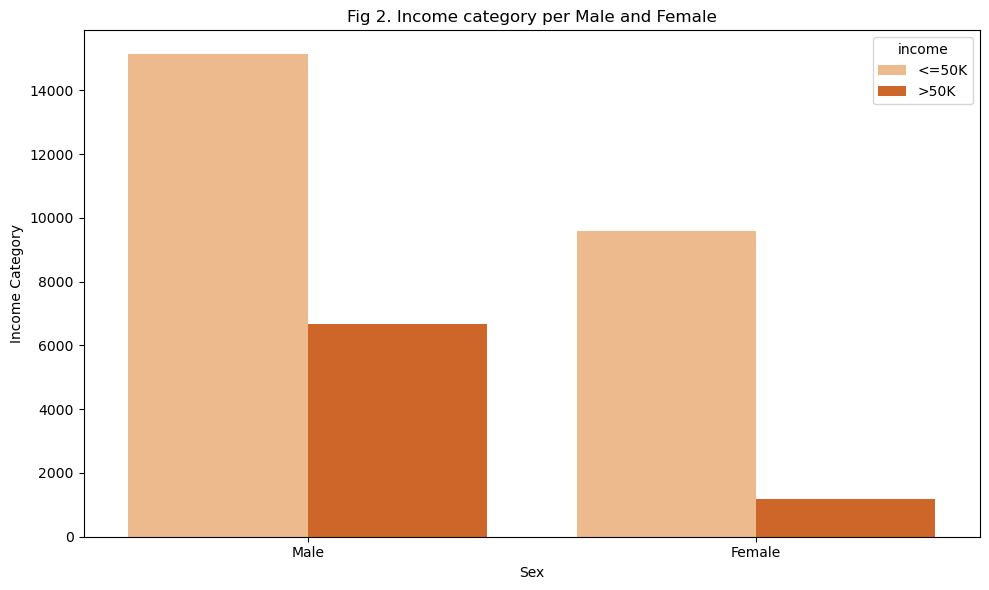

In [25]:
#group sex and income, to get a view of how the income is distributed between genders
incomeSize= adultIncome.groupby(['income','sex']).size().reset_index(name='amount')
incomeSize.sort_values('amount', ascending=False, inplace=True)#sort values descending

#size of the plot
plt.figure(figsize=(10, 6))
#using seaborn plot
sns.barplot(data=incomeSize, x='sex', y='amount', hue='income', palette='Oranges')
#add title
plt.title('Fig 2. Income category per Male and Female')
#add x label
plt.xlabel('Sex')
#add y label
plt.ylabel('Income Category')


# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

Indeed, most of the men used to have an income above >50k, to be more precise almost 10,000 men earn >50k and less than 1,000 women could reach that amount, within these two insights we can clearly see that the workforce for 1994 was mostly men.

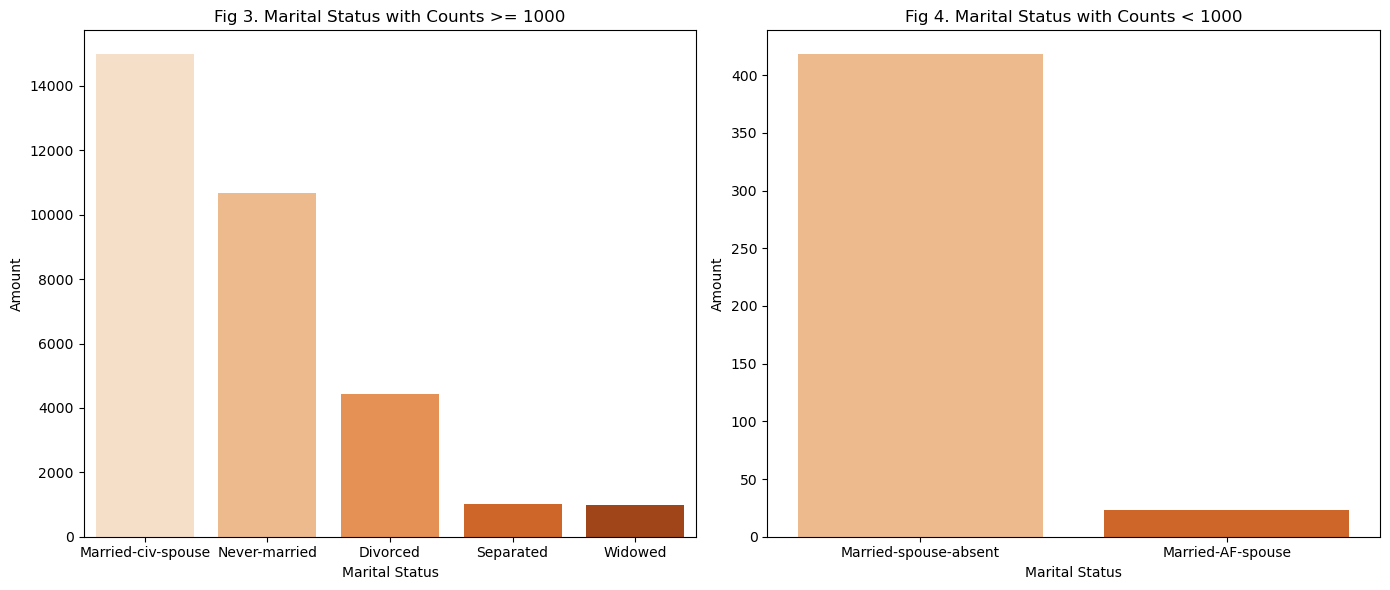

In [26]:
# Get value counts of marital status
maritalStatus = adultIncome.groupby(['marital.status']).size().reset_index(name='count')

# Get categories with counts bigger than or equal to 1,000
maritalBigger1000 = maritalStatus[maritalStatus['count'] >= 800].copy()
# Get categories with counts less than 1,000
maritalLess1000 = maritalStatus[maritalStatus['count'] < 800].copy()

#sort values in descending order
maritalBigger1000.sort_values('count', ascending=False, inplace=True)
maritalLess1000.sort_values('count', ascending=False, inplace=True)


# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Using seaborn barplot for marital status with counts >= 1000
sns.barplot(data=maritalBigger1000, x='marital.status', y='count',  ax=ax1 , palette='Oranges' )
#add title
ax1.set_title('Fig 3. Marital Status with Counts >= 1000')
#add x label
ax1.set_xlabel('Marital Status')
#add y label
ax1.set_ylabel('Amount')

# Using seaborn barplot for marital status with counts < 1000
sns.barplot(data=maritalLess1000,  x='marital.status', y='count',  ax=ax2 , palette='Oranges')
#add title
ax2.set_title('Fig 4. Marital Status with Counts < 1000')
#add x label
ax2.set_xlabel('Marital Status')
#add y label
ax2.set_ylabel('Amount')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

As we try to understand the data better, we need to understand also that in the 90s, most of the family were composed of traditional families (father, mother, children), therefore the need for women to work was absent, this can be proven with the  figure 3, and 4, more than 14,000 people in our dataset was married, in conclusion, the man was the provider for the family 

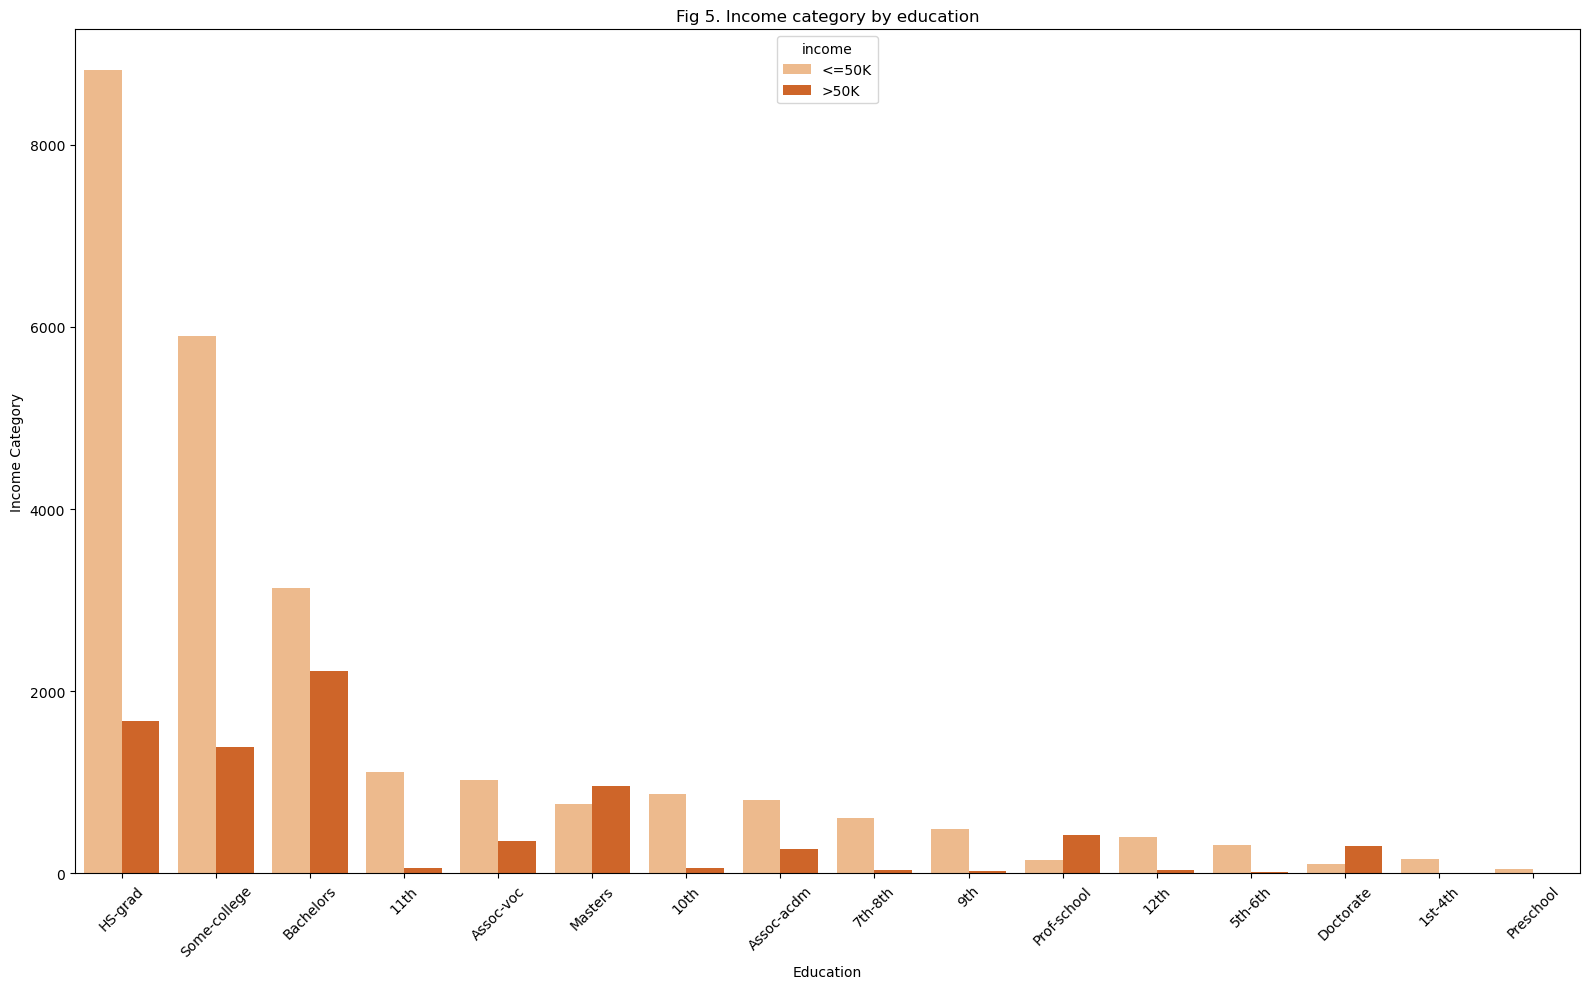

In [27]:
#group sex and income, to get a view of how the income is distributed between genders
incomeSize= adultIncome.groupby(['income','education']).size().reset_index(name='amount')
incomeSize.sort_values('amount', ascending=False, inplace=True)#sort values descending

#size of the plot
plt.figure(figsize=(16, 10))
#using seaborn plot
sns.barplot(data=incomeSize, x='education', y='amount', hue='income', palette='Oranges')
#add title
plt.title('Fig 5. Income category by education')
#add x label
plt.xlabel('Education')
plt.xticks(rotation=45)
#add y label
plt.ylabel('Income Category')


# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

When it comes to education, we try to search for some relationship between higher education and better income, but this cannot be applied to all cases as we can see the majority of people who have a degree like a bachelor’s, college, do not exceed a the >50k income, in contrast with educations like master and PhD, where the outcomes of getting these degrees were well awarded. 

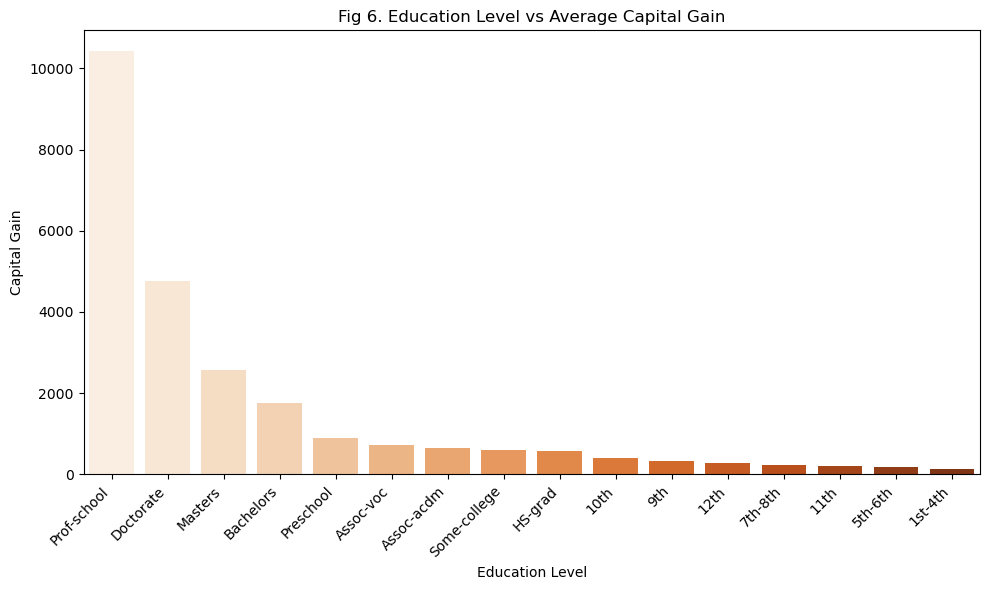

In [28]:
# #group sex and income, to get a view of how the income is distributed between genders
educationGain= adultIncome.groupby('education')['capital.gain'].mean().reset_index()
educationGain.sort_values('capital.gain', ascending=False, inplace=True)#sort values descending

#size of the plot
plt.figure(figsize=(10, 6))
#using seaborn plot
sns.barplot(data=educationGain, x='education', y='capital.gain', palette='Oranges')
#add title
plt.title('Fig 6. Education Level vs Average Capital Gain')
#add x label
plt.xlabel('Education Level')
#add y label
plt.ylabel('Capital Gain')
#rotate axis
plt.xticks(rotation=45, ha='right')


# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

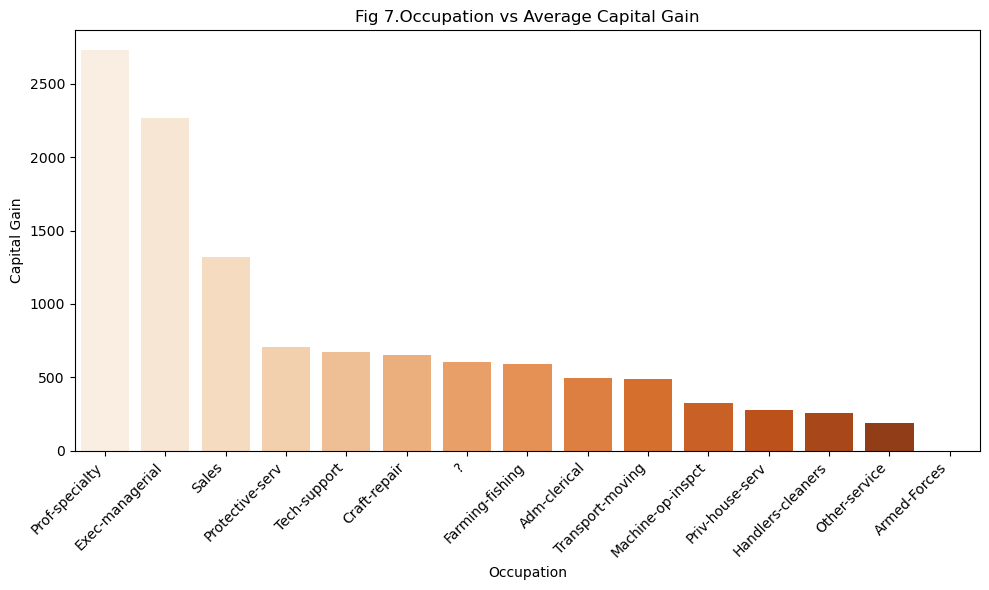

In [29]:
# #group sex and income, to get a view of how the income is distributed between genders
occupationGain= adultIncome.groupby('occupation')['capital.gain'].mean().reset_index()
occupationGain.sort_values('capital.gain', ascending=False, inplace=True)#sort values descending

#size of the plot
plt.figure(figsize=(10, 6))
#using seaborn plot
sns.barplot(data=occupationGain, x='occupation', y='capital.gain', palette='Oranges')
#add title
plt.title('Fig 7.Occupation vs Average Capital Gain')
#add x label
plt.xlabel('Occupation')
#add y label
plt.ylabel('Capital Gain')
#rotate axis
plt.xticks(rotation=45, ha='right')


# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

3. Usefulness of data

Every feature has its importance to this analysis, and for that reason, we believe all will contribute in a good way to the future model that will be built with this data. 

So far, we have taken a deeper look at income, education, and marital status and agree with their importance, but we have also analyzed features like work class, which show how most of the people work for the private sector, also seen how occupation is a balanced feature, since the distribution of its values we could say is normal. Also, race is a factor that talks by itself, as we saw most of them were white, which means the income could be true for most white races, but when it comes to other races that might have the same background, education, relationship, marital status etc, we get different results. 

### III. Prepare data 
1. Clean the data:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).


In [30]:
#rename some columns
adultIncome.rename(columns={"education.num":"education num","marital.status":"marital status",
                           "capital.loss":"capital loss", "hours.per.week":"hours per week"},inplace=True)



In [31]:
#show columns name to see changes 
adultIncome.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education num',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital loss', 'hours per week', 'native.country',
       'income'],
      dtype='object')

We have seen at the beginning that most of the missing values are filled with ‘?’; for this we decide to change the question mark to none, allowing us to take a better look at the missing values

In [32]:
#use replace to change missing value for none
adultIncome= adultIncome.replace("?",None)

In [33]:
#take a look at our values changed 
adultIncome

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital.gain,capital loss,hours per week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


##### Missing values

In [34]:
#show the percentage of null values 
adultIncome.isnull().sum()/len(adultIncome) *100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education num     0.000000
marital status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital loss      0.000000
hours per week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

So far, we have changed some feature names to ones that are easy to understand and easy to use. Also, we have calculated the percentage of missing values we have, and as we can see for the features of work class and occupation, we do have the same percentage; what we will do is analyze if these are related to each other and how we can deal with them, maybe we can impute the with the information of other features.

In [35]:
adultIncome["workclass"].describe(include="object")

count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [36]:
adultIncome["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [37]:
adultIncome[adultIncome[['workclass', 'occupation', 'native.country']].isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital.gain,capital loss,hours per week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,None,>50K
14,51,None,172175,Doctorate,16,Never-married,None,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,None,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,None,320084,Bachelors,13,Married-civ-spouse,None,Wife,White,Female,0,0,55,United-States,>50K
32534,30,None,33811,Bachelors,13,Never-married,None,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,None,287372,Doctorate,16,Married-civ-spouse,None,Husband,White,Male,0,0,10,United-States,>50K
32543,41,None,202822,HS-grad,9,Separated,None,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [38]:
#drop the rows with missing values
adultIncome.dropna(subset=['workclass', 'occupation'], inplace=True)

As we can see, the work class and occupation are related, and this information cannot be populated from other columns since each case is different. That’s why we will not impute this value but drop the rows with those missing values.  

In [39]:
adultIncome.nunique()

age                  72
workclass             7
fnlwgt            20495
education            16
education num        16
marital status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        118
capital loss         90
hours per week       94
native.country       41
income                2
dtype: int64

In [40]:
#for the native.country we decided to imputate the value with the most used value (mode)
mode = adultIncome["native.country"].mode().iloc[0]
adultIncome["native.country"].fillna(mode, inplace=True)

In [41]:
adultIncome.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital loss      0
hours per week    0
native.country    0
income            0
dtype: int64

###### Outliers

<Axes: ylabel='fnlwgt'>

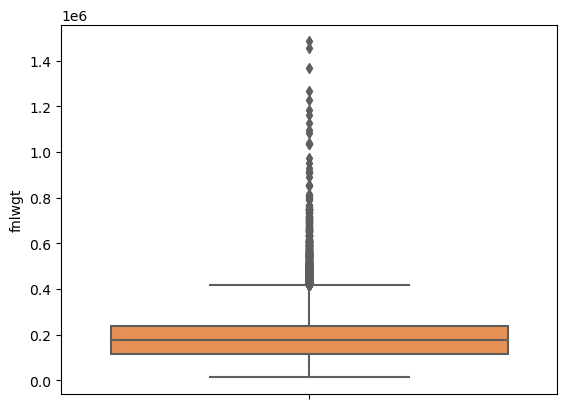

In [42]:
sns.boxplot(y=adultIncome["fnlwgt"], palette='Oranges')

In [43]:
#final weight:The number of people with same income sources in same country
QRT1 = adultIncome["fnlwgt"].quantile(0.25)
QRT3 = adultIncome["fnlwgt"].quantile(0.75)
IQ_Range = QRT3 - QRT1
adultIncome = adultIncome[~((adultIncome["fnlwgt"] < (QRT1 - 1.5 * IQ_Range)) | (adultIncome["fnlwgt"] > (QRT3 + 1.5 * IQ_Range)))]

<Axes: ylabel='fnlwgt'>

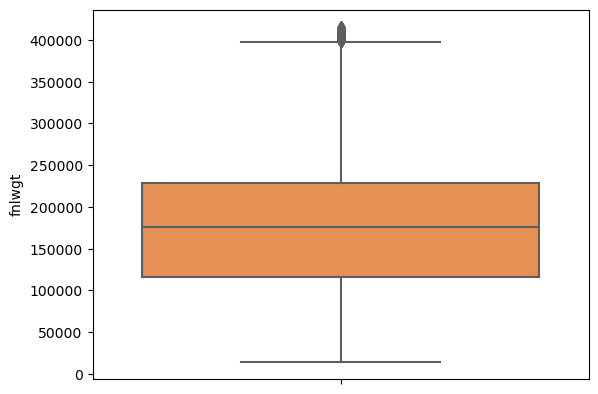

In [44]:
sns.boxplot(y=adultIncome["fnlwgt"], palette='Oranges')

Since this is a dataset that could be used for classification, dealing with outliers in categorical features is dealing with important data, data that can be crucial for the model to keep learning; that’s why we recommend letting the outliers be, since in real life you might have many outliers that won’t be considered as noise in the data, and we need to learn how to deal with them in the modeling phase, for educational purposes we have decided to use fnlwgt as an example and treat the outliers by using the 3rd quartile of this feature, since this feature means the number of people with the same characteristic and income, like we could have 2,000 of   male, married, with 30 years and a bachelor, earning below 50k.

<Axes: ylabel='education num'>

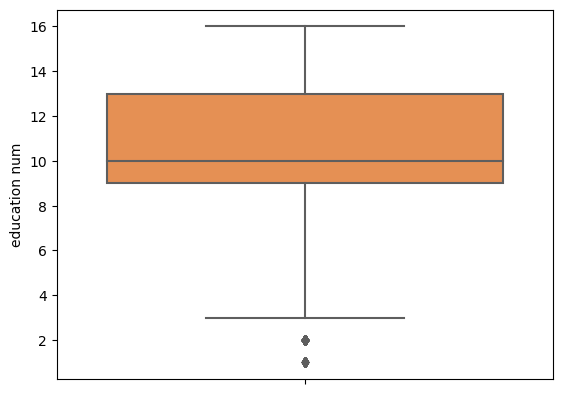

In [45]:
#outliers for education
sns.boxplot(y=adultIncome["education num"], palette='Oranges')

<Axes: ylabel='capital.gain'>

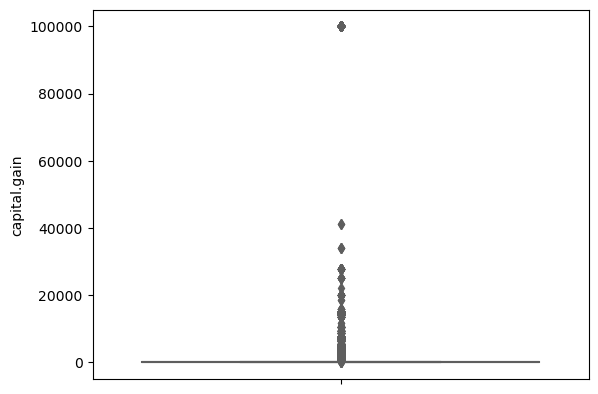

In [46]:
#outliers for capital.gain
sns.boxplot(y=adultIncome["capital.gain"], palette='Oranges')

In [47]:
adultIncome[adultIncome["capital.gain"]>30000]['capital.gain']

1519    99999
1520    99999
1521    99999
1522    99999
1523    99999
        ...  
1678    41310
1679    41310
1681    34095
1682    34095
1683    34095
Name: capital.gain, Length: 155, dtype: int64

<Axes: ylabel='capital loss'>

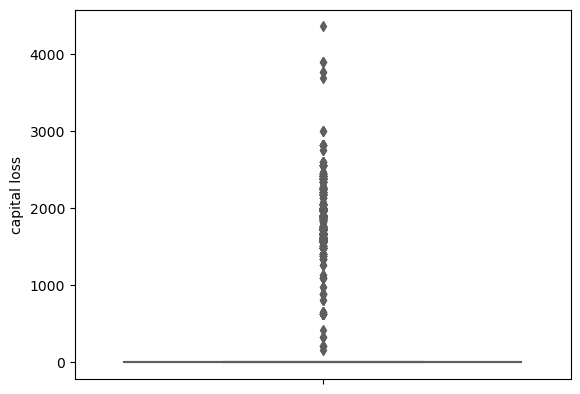

In [48]:
#outliers for capital loss
sns.boxplot(y=adultIncome["capital loss"], palette='Oranges')

For capital gain and capital loss features we can see after  describe  function that the mean is greater than the median, and also max and min for those numerical columns have a big difference, for this particular case “adult income”, most of the people might make an average salary, in the other hand there are some with a few high earners at the top, those values are impacting the median in an income distribution. In our case we have only two values >50K and <=50K, for that reason if we select this data set for a classification model  with target feature income, those values are not impacting the distribution in our case, but can give the model important information for that reason we don’t want to consider those outliers.  
However, for ‘education num’ feature also we get some smalls values in the box plot,  representing less than 2 year for education. Those values look like outliers, but also we decide to keep them because there is some important information for an adult income regarding the education level.
The numerical feature ‘fnlwgt’: final weight,  denote the number of people the census believes the entry represents. That information is giving a value for each row of information and adjust the imbalance of the samples. Otherwise, we can see in the distribution box plot  that there is some outliers in this column, we decided to deal with those outlier  because it can give us better distribution of the final weight, and  can be more accurate.

#### Correlations

In [49]:
#before showing the correlation we need to convert all our categorical values to numerical 

#for some variables that are  Dichotomous: sex, income we will change it to cero and one 

# change the income to 0 and 1 
income_map = {'<=50K': 0, '>50K': 1}

# change the gender to 0 and 1
sex_map = {'Female': 0, 'Male': 1}

#apply map to income -> map iterate through each row to update the value to 0 and 1
adultIncome.loc[:, 'income']  = adultIncome['income'].map(income_map)

#apply map to sex -> map iterate through each row to update the value to 0 and 1
adultIncome.loc[:, 'sex']  = adultIncome['sex'].map(sex_map)



In [50]:
# since it only apply cero and one but do not convert to int then we apply the conversion
adultIncome['income'] = adultIncome['income'].astype(int)
adultIncome['sex'] = adultIncome['sex'].astype(int)



/var/folders/3c/4jp44td56g5bg52_nbjdy4gh0000gn/T/ipykernel_43690/3900796873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultIncome['income'] = adultIncome['income'].astype(int)
/var/folders/3c/4jp44td56g5bg52_nbjdy4gh0000gn/T/ipykernel_43690/3900796873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultIncome['sex'] = adultIncome['sex'].astype(int)


In [51]:

adultIncome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29792 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29792 non-null  int64 
 1   workclass       29792 non-null  object
 2   fnlwgt          29792 non-null  int64 
 3   education       29792 non-null  object
 4   education num   29792 non-null  int64 
 5   marital status  29792 non-null  object
 6   occupation      29792 non-null  object
 7   relationship    29792 non-null  object
 8   race            29792 non-null  object
 9   sex             29792 non-null  int64 
 10  capital.gain    29792 non-null  int64 
 11  capital loss    29792 non-null  int64 
 12  hours per week  29792 non-null  int64 
 13  native.country  29792 non-null  object
 14  income          29792 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 3.6+ MB


In [52]:
#in order to se the correlation we decided to change the categorical values to get dummies 

#select the categorical features 
categoricalValues = ['workclass','education','marital status','occupation','relationship','race', 'native.country']

#apply dummies
dummiesDf = pd.get_dummies(adultIncome[categoricalValues])

#show the new features and values of the new dummies values 
dummiesDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29792 entries, 1 to 32560
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   workclass_Federal-gov                      29792 non-null  bool 
 1   workclass_Local-gov                        29792 non-null  bool 
 2   workclass_Private                          29792 non-null  bool 
 3   workclass_Self-emp-inc                     29792 non-null  bool 
 4   workclass_Self-emp-not-inc                 29792 non-null  bool 
 5   workclass_State-gov                        29792 non-null  bool 
 6   workclass_Without-pay                      29792 non-null  bool 
 7   education_10th                             29792 non-null  bool 
 8   education_11th                             29792 non-null  bool 
 9   education_12th                             29792 non-null  bool 
 10  education_1st-4th                          29792 no

In [53]:
#drop the columns that we already apply get dummies 
adultIncomeDf = adultIncome.drop(columns= categoricalValues)

#join the dummies and adultIncomeDf
adultIncomeDfDummies = adultIncomeDf.join(dummiesDf)

#show the info of the dataset
adultIncomeDfDummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29792 entries, 1 to 32560
Columns: 104 entries, age to native.country_Yugoslavia
dtypes: bool(96), int64(8)
memory usage: 5.8 MB


In [54]:
#see the head and tail 
adultIncomeDfDummies

,age,fnlwgt,education num,sex,capital.gain,capital loss,hours per week,income,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,0,4356,18,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,3900,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,3900,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,0,3770,45,0,False,False,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,1,0,3770,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

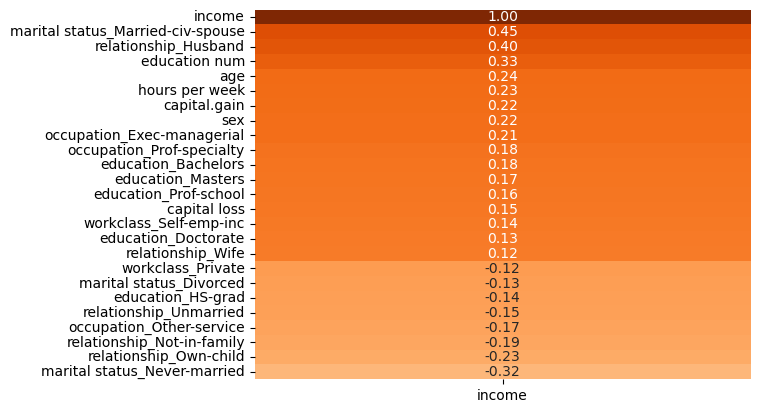

In [55]:


#get the correlation of income
correlation = adultIncomeDfDummies.corr()['income'].sort_values(ascending=False)

# get the only the relevant features
relevantCols = correlation[np.abs(correlation) > 0.1].index

#plot the correlation 
sns.heatmap(data=adultIncomeDfDummies[relevantCols].corr()[['income']].sort_values('income', ascending=False),
            annot=True, cmap='Oranges', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

#as we can see the most correlated categorical varuables are marrital status marital status_Married-civ-spouse,
#marital status_Never-married , and relationship_husband, relationship_Own-child , education num, age 



### Conclusions 

Throughout this dataset, we have gathered much information about adult income for 1994, understand the importance of each feature, and get insight from features we considered necessary for the results. Also, we have to deal with missing values following the best approaches to avoid introducing bias in the data, and we also have to deal with outliers.

We can conclude that this model will be excellent for a classification problem since the target feature, we did our research about was income, also most of our variables were categorical, which makes it best suited for resolving the following problem:

Is the income higher or lower than 50k?
